##Taste of Supervised Learning

### What is K-Nearest Neighbors?
- is a supervised learning algorithm where the data is 'trained' with data points corresponding to their classification. 
- To predict the class of a given data point, KNN takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

### For better clarity visualization of the K-Nearest Neighbors algorithm
<img src = './images/knn_fig.png'></img>

## Case: Telecommunication service usage categorization via k-Nearest Neighbors


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Telecommunications Dataset 
- provider has segmented its customer base by service usage patterns, categorizing the customers into four groups
- Company want to use demographic data to predict group membership, if this works, the company can customize offers for individual prospective customers
- Thus, it is a classification problem i.e., **given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case**

## Dataset attributes and values
- Demographic data, such as region, age, and marital, to predict usage patterns
- Target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service


In [9]:
#Load the Data
df = pd.read_csv("/content/gdrive/MyDrive/2023_Mobility/Talks/ToSuLe-main/datasets/telecom.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


##Data Visualization and Analysis

### Let’s see how many of each class is in our data set

In [10]:

df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### Output: 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

array([[<Axes: title={'center': 'income'}>]], dtype=object)

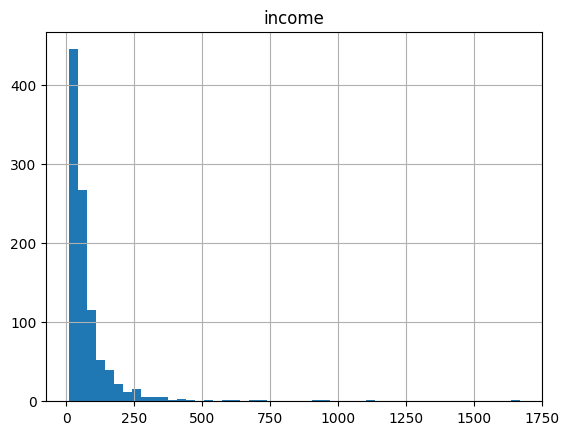

In [11]:
#Histogram visualization
df.hist(column='income', bins=50)

## Feature set

#### Let's define feature sets, X:

In [12]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [13]:
X = df[['region','tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

#### What are our labels?

In [14]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

##Normalize Data


#### Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [17]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification - Scikit-Learn KNN
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [19]:
from sklearn.neighbors import KNeighborsClassifier

## Training

#### Let's start the algorithm with k=4 for now:

In [20]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

## Predicting
#### We can use the model to make predictions on the test set:

In [21]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

## Accuracy evaluation


In [32]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [33]:

print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## Are we done? May not be (most important is which K value is good to choose?)

### Choosing a K Value

####Let's go ahead and use the elbow method to pick a good K Value:


In [23]:
error_rate = []

In [24]:
# Will take some time

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

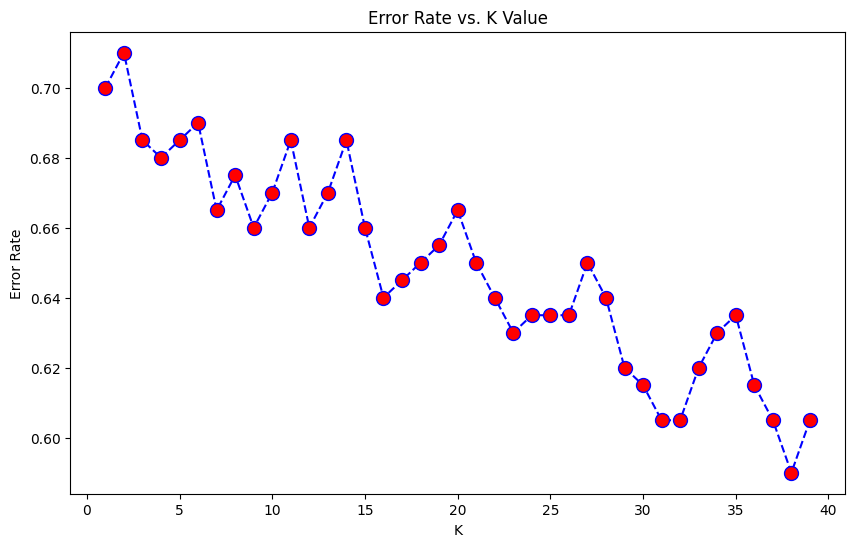

In [25]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')

#### /<< This changes at every iteration />> Here we can see that that after around K> some number the error rate just tends to hover around 0.01-0.02 Let's retrain the model with that and check the classification report!


In [34]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[17 10 17  7]
 [ 9 13 11 11]
 [10 12 17 15]
 [17 10 11 13]]


              precision    recall  f1-score   support

           1       0.32      0.33      0.33        51
           2       0.29      0.30      0.29        44
           3       0.30      0.31      0.31        54
           4       0.28      0.25      0.27        51

    accuracy                           0.30       200
   macro avg       0.30      0.30      0.30       200
weighted avg       0.30      0.30      0.30       200



In [41]:
# NOW WITH K=38 (Best k-value)
knn = KNeighborsClassifier(n_neighbors=38)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=38')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=38


[[29  1 17  4]
 [ 8 13 14  9]
 [22  2 26  4]
 [21  5 11 14]]


              precision    recall  f1-score   support

           1       0.36      0.57      0.44        51
           2       0.62      0.30      0.40        44
           3       0.38      0.48      0.43        54
           4       0.45      0.27      0.34        51

    accuracy                           0.41       200
   macro avg       0.45      0.41      0.40       200
weighted avg       0.45      0.41      0.40       200



In [42]:
print("Train set Accuracy: ",accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


Interpretation:
???

##Feel free to contact
#Shankar Gangisetty - https://sites.google.com/site/shankarsetty